In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
from matplotlib import style

In [2]:
start = dt.datetime(2015,1,1)
end = dt.datetime(2017,12,31)
tsla = pdr.DataReader('TSLA','yahoo',start,end)

In [3]:
type(tsla)

pandas.core.frame.DataFrame

In [4]:
print(tsla.head(),'\n'*3)
print('===============================================================')
print(tsla.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-12-31  223.089996  225.679993  222.250000  222.410004  222.410004   
2015-01-02  222.869995  223.250000  213.259995  219.309998  219.309998   
2015-01-05  214.550003  216.500000  207.160004  210.089996  210.089996   
2015-01-06  210.059998  214.199997  204.210007  211.279999  211.279999   
2015-01-07  213.350006  214.779999  209.779999  210.949997  210.949997   

             Volume  
Date                 
2014-12-31  2402100  
2015-01-02  4764400  
2015-01-05  5368500  
2015-01-06  6261900  
2015-01-07  2968400   



                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-12-22  329.510010  330.920013  324.820007  325.200012  325.200012   
2017-12-26  323.829987  323.940002  316.579987  317.290009  317.290009   
2017-12-27  316.000000  317

In [5]:
tsla.reset_index(inplace='true') # 重新设置index inplace=True表示在原dataframe上操作 不产生新的dataframe
tsla.set_index('Date',inplace=True) # 将'Date'这一列作为index排序
# tsla.drop(['Adj Close'],axis=1,inplace=True) #丢弃'Adj Close'这一列
tsla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-22,329.510010,330.920013,324.820007,325.200012,325.200012,4215800
2017-12-26,323.829987,323.940002,316.579987,317.290009,317.290009,4378400
2017-12-27,316.000000,317.679993,310.750000,311.640015,311.640015,4712100
2017-12-28,311.750000,315.820007,309.540009,315.359985,315.359985,4316300
2017-12-29,316.179993,316.410004,310.000000,311.350006,311.350006,3777200


In [6]:
tsla.to_csv('tsla.csv')
# tsla.to_csv('/Users/zi-qinzhou/Documents/LearnBySelf/Quant/TSLA.csv')

In [7]:
result = pd.read_csv('tsla.csv', parse_dates = True, index_col=0)

In [8]:
result.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,223.089996,225.679993,222.250000,222.410004,222.410004,2402100
2015-01-02,222.869995,223.250000,213.259995,219.309998,219.309998,4764400
2015-01-05,214.550003,216.500000,207.160004,210.089996,210.089996,5368500
2015-01-06,210.059998,214.199997,204.210007,211.279999,211.279999,6261900
2015-01-07,213.350006,214.779999,209.779999,210.949997,210.949997,2968400


In [9]:
print(type(result.Volume[0]))

<class 'numpy.int64'>


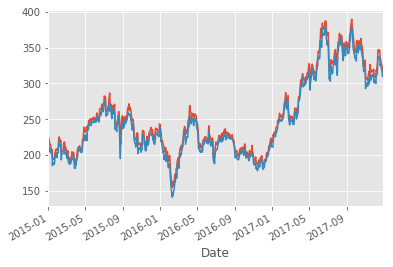

In [10]:
style.use('ggplot')
result.High.plot()
result['Low'].plot()
plt.show()

In [11]:
result[['High','Low']].head()

,High,Low
Date,,
2014-12-31,225.679993,222.250000
2015-01-02,223.250000,213.259995
2015-01-05,216.500000,207.160004
2015-01-06,214.199997,204.210007
2015-01-07,214.779999,209.779999


In [12]:
result['100ma'] = result['Adj Close'].rolling(window=100).mean()
result['100ma'] = result['Adj Close'].rolling(window=100,min_periods=0).mean() 
# min_periods可以为任何数字，丛这个数字所代表的row开始算起，如果没有min_periods这个参数， 则从
#window所代表的数值开始计算，之前的都为None

In [13]:
result.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2014-12-31,223.089996,225.679993,222.250000,222.410004,222.410004,2402100,222.410004
2015-01-02,222.869995,223.250000,213.259995,219.309998,219.309998,4764400,220.860001
2015-01-05,214.550003,216.500000,207.160004,210.089996,210.089996,5368500,217.269999
2015-01-06,210.059998,214.199997,204.210007,211.279999,211.279999,6261900,215.772499
2015-01-07,213.350006,214.779999,209.779999,210.949997,210.949997,2968400,214.807999


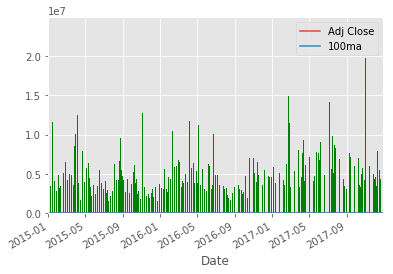

In [14]:
result[['Adj Close','100ma']].plot()
plt.bar(result.index, result['Volume'],color='g')
plt.show()